In [22]:
from langgraph.graph import StateGraph, START, END  
from typing import TypedDict

In [23]:
# Define the state

class BMIState(TypedDict):
    weight: float  # in kilograms
    height: float  # in meters
    bmi: float     # Body Mass Index
    bmi_category: str # BMI category (e.g., Underweight, Normal weight, Overweight, Obesity)

In [24]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight']
    height = state['height']
    bmi = weight / (height ** 2)

    state['bmi'] = round(bmi, 2)
    
    return state

def label_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        category = 'Underweight'
    elif 18.5 <= bmi < 25:
        category = 'Normal weight'
    elif 25 <= bmi < 30:
        category = 'Overweight'
    else:
        category = 'Obesity'
    state['bmi_category'] = category
    return state

In [27]:
## Define the graph
bmi_graph = StateGraph(BMIState)

## Add nodes to the graph
bmi_graph.add_node("calculateBMI", calculate_bmi)
bmi_graph.add_node("categorizeBMI", label_bmi)

## Add edges to the graph
bmi_graph.add_edge(START, "calculateBMI")
bmi_graph.add_edge("calculateBMI", "categorizeBMI")  
bmi_graph.add_edge("categorizeBMI", END)

## compile the graph
workflow = bmi_graph.compile()


In [28]:
## execute the workflow
initial_state = {"weight": 70, "height": 1.75}
final_state = workflow.invoke(initial_state)  
final_state         

{'weight': 70, 'height': 1.75, 'bmi': 22.86, 'bmi_category': 'Normal weight'}

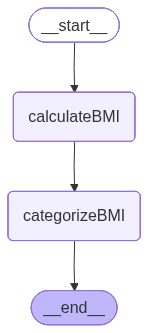

In [29]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())